In [3]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import *
from math import sqrt, pi

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Quick Exercises 1

### 1. Write down the tensor product of the qubits:
 a. |0⟩|1⟩
        $$ \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$
 b. |0⟩|+⟩
        $$ \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix} $$
 c. |+⟩|1⟩ 
        $$ \frac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \end{bmatrix} $$
 d. |−⟩|+⟩
        $$ \frac{1}{2} \begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \end{bmatrix} $$

### 2. Write the state: $$ |\psi⟩= \frac{1}{\sqrt{2}} |00⟩+ \frac{i}{\sqrt{2}} |01⟩ $$ as two separate qubits

This is simply a matter of expanding the tensor product. The answer is apparent when completed 
$$ |\psi⟩= \frac{1}{\sqrt{2}} |00⟩+ \frac{i}{\sqrt{2}} |01⟩ = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \\ 0 \\ 0 \end{bmatrix} = |0⟩|\circlearrowright⟩ $$

## Quick Exercises 2

### 1. Calculate the single qubit unitary (U) created by the sequence of gates: U=XZH. Use Qiskit's unitary simulator to check your results.

$$ \displaystyle U = XZH = \frac{1}{\sqrt{2}}  \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}  \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}  \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} -1 & 1 \\ 1 & 1 \end{bmatrix}$$

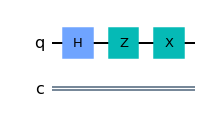

In [4]:
circuit = QuantumCircuit(1, 1)
circuit.h(0)
circuit.z(0)
circuit.x(0)
circuit.draw('mpl')

In [7]:
from qiskit_textbook.tools import array_to_latex
unitarySim = Aer.get_backend('unitary_simulator')
matrixCircuit =  execute(circuit, backend = unitarySim).result().get_unitary()
array_to_latex(matrixCircuit, pretext="\\text{Circuit = } ")

<IPython.core.display.Math object>